In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st

In [ ]:
# Read the csv files
city_file_to_load = pd.read_csv("Resources/city_data.csv")
ride_file_to_load = pd.read_csv("Resources/ride_data.csv")

In [ ]:
# Create a pandas DataFrame for city data
city_data_df = pd.DataFrame(city_file_to_load)
city_data_df

In [ ]:
# Check for any data anomaly
city_data_df.isnull().sum()

In [ ]:
city_data_df.count()

In [ ]:
# Check the datatypes of each column
city_data_df.dtypes

In [ ]:
city_data_df.describe()

In [ ]:
# Create a pandas DataFrame for ride data
ride_data_df = pd.DataFrame(ride_file_to_load)
ride_data_df.head(10)

In [ ]:
# Check for data anomaly
ride_data_df.isnull().sum()

In [ ]:
ride_data_df.count()

In [ ]:
ride_data_df.dtypes

In [ ]:
ride_data_df.describe()

In [ ]:
# Finally, we'll check to see how many data points there are for each type of city.
# Get unique values of the type of the city
city_types_list = city_data_df["type"].unique()
city_types_list

In [ ]:
# Get the number of data points for the urban cities
sum(city_data_df['type']=='Urban')

In [ ]:
# Get the number of data points for the suburban cities
sum(city_data_df['type']=='Suburban')

In [ ]:
# Get the number of data points for the Rural cities
sum(city_data_df['type']=='Rural')


In [ ]:
# All the data looks good with no null values
# Merge the two DataFrames
pyber_data_df = pd.merge(ride_data_df, city_data_df, on = "city", how = "left")
pyber_data_df.head()

In [ ]:
# Create three separate DataFrames, one for each type of city
# Create the urban city DataFrame
urban_city_df = pyber_data_df[(pyber_data_df["type"]=="Urban")]
urban_city_df.head()

In [ ]:
# Create the suburban city DataFrame
suburban_city_df = pyber_data_df[(pyber_data_df["type"]=="Suburban")]
suburban_city_df.head()

In [ ]:
# Create the rural city DataFrame
rural_city_df = pyber_data_df[(pyber_data_df["type"]=="Rural")]
rural_city_df.head()

In [ ]:
# Get the number of rides in each city for urban city type
urban_rides_count = urban_city_df.groupby(["city"]).count()["ride_id"]
urban_rides_count.head()

In [ ]:
# Get the number of rides in each city for suburban city type
suburban_rides_count = suburban_city_df.groupby(["city"]).count()["ride_id"]
suburban_rides_count.head()

In [ ]:
# Get the number of rides in each city for rural city type
rural_rides_count = rural_city_df.groupby(["city"]).count()["ride_id"]
rural_rides_count.head()

In [ ]:
# Get the average fare for urban city type
urban_cities_fares = urban_city_df.groupby(["city"]).mean()["fare"]
urban_cities_fares.head()

In [ ]:
# Get the average fare for suburban city type
suburban_cities_fares = suburban_city_df.groupby(["city"]).mean()["fare"]
suburban_cities_fares.head()

In [ ]:
# Get the average fare for rural city type
rural_cities_fares = rural_city_df.groupby(["city"]).mean()["fare"]
rural_cities_fares.head()

In [169]:
# Get the average driver count in each city for each city type
# Get the urban driver count for each city
urban_driver_count = urban_city_df.groupby(["city"])["driver_count"].mean()
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [ ]:
# Get the suburban driver count for each city
suburban_driver_count = suburban_city_df.groupby(["city"])["driver_count"].mean()
suburban_driver_count.head()

In [ ]:
# Get the rural driver count for each city
rural_driver_count = rural_city_df.groupby(["city"])["driver_count"].mean()
rural_driver_count.head()

## Create individual bubble plots for urban, suburban and rural cities

In [ ]:
# Create a scatter plot for urban city type
plt.scatter(urban_rides_count, urban_cities_fares, s=urban_driver_count*10, color="coral", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Urban")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Create a scatter plot for suburban city type
plt.scatter(suburban_rides_count, suburban_cities_fares, s=suburban_driver_count*10, color="skyblue", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Suburban")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# create a scatter plot for rural city type
#plt.subplots(figsize=(10,10))
plt.scatter(rural_rides_count, rural_cities_fares, s=rural_driver_count*10, color="gold", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Rural")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# We will combine our three scatter plot code blocks in one Jupyter Notebook cell.
# Add the scatter charts for each type of city.

# Increase the plot size.
plt.subplots(figsize=(10,6))


plt.scatter(urban_rides_count, urban_cities_fares, s=urban_driver_count*10, color="coral", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Urban")

plt.scatter(suburban_rides_count, suburban_cities_fares, s=suburban_driver_count*10, color="skyblue", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Suburban")

plt.scatter(rural_rides_count, rural_cities_fares, s=rural_driver_count*10, color="gold", 
            alpha=0.8, linewidth=1, edgecolor="black", label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create the legend
lgnd = plt.legend(fontsize=12, title="City Types", loc="best", mode="Expanded", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

# Save the plot
plt.savefig("Analysis/BubbleChart.png")


# Show the plot
plt.show()

## Summary Statistics for Number of Rides by City Type

In [ ]:
# Pandas describe() function
pyber_data_df.describe()

In [ ]:
# Get Summary Statistics.
# Let's use the describe() function on the urban, suburban, and rural DataFrames.
urban_city_df.describe()

In [ ]:
suburban_city_df.describe()

In [ ]:
rural_city_df.describe()

In [ ]:
urban_rides_count.describe()

In [ ]:
suburban_rides_count.describe()

In [ ]:
rural_rides_count.describe()

In [ ]:
# Pandas mean(), median(), and mode() Methods
# Calculate the mean of the ride count for each city type.
round(urban_rides_count.mean(),2), round(suburban_rides_count.mean(),2), round(rural_rides_count.mean(),2)

In [ ]:
# Calculate the median of the ride count for each city type.
round(urban_rides_count.median(),2), round(suburban_rides_count.median(),2), round(rural_rides_count.median(),2)

In [ ]:
# Calculate the mode of the ride count for the urban cities.
urban_rides_count.mode()

In [ ]:
# Calculate the mode of the ride count for the suburban cities.
suburban_rides_count.mode()

In [ ]:
# Calculate the mode of the ride count for the rural cities.
rural_rides_count.mode()

In [ ]:
# NumPy mean() and median() Functions and SciPy mode() Function
# import stats module from SciPy
import scipy.stats as sts

In [ ]:
urban_rides_mean = round(np.mean(urban_rides_count),2)
urban_rides_median = round(np.median(urban_rides_count),2)

# Unlike the Pandas mode() method, the sts.mode() method 
# will return the number of times the mode appears in the dataset
urban_rides_mode = sts.mode(urban_rides_count)
print(f"The mode for the ride counts for urban trips is {urban_rides_mode}.")

print(urban_rides_mean, urban_rides_median)

In [ ]:
suburban_rides_mean = round(np.mean(suburban_rides_count),2)
suburban_rides_median = round(np.median(suburban_rides_count),2)

suburban_rides_mode = sts.mode(suburban_rides_count)
print(f"The mode for the ride counts for suburban trips is {suburban_rides_mode}.")

print(suburban_rides_mean, suburban_rides_median)

In [ ]:
rural_rides_mean = round(np.mean(rural_rides_count),2)
rural_rides_median = round(np.median(rural_rides_count),2)

rural_rides_mode = sts.mode(rural_rides_count)
print(f"The mode for the ride counts for urban trips is {rural_rides_mode}.")
print(rural_rides_mean, rural_rides_median)

## Summary Statistics for the Fare by City Type

In [ ]:
# Get the fares from urban city type
urban_fares = urban_city_df["fare"]
urban_fares

In [ ]:
# Calculate mean(), median() and mode() for ride fares in each city type
urban_fare_mean = round(np.mean(urban_fares),2)
urban_fare_median = round(np.median(urban_fares),2)
urban_fare_mode = sts.mode(urban_fares)

print(f"The mean : ${urban_fare_mean}", 
      f"The median : ${urban_fare_median}, The mode : {urban_fare_mode}")

In [ ]:
# Get the fares from suburban city type
suburban_fares = suburban_city_df["fare"]
suburban_fares

In [ ]:
# Calculate mean(), median() and mode() for ride fares in each city type
suburban_fare_mean = round(np.mean(suburban_fares),2)
suburban_fare_median = round(np.median(suburban_fares),2)
suburban_fare_mode = sts.mode(suburban_fares)

print(f"The mean : ${suburban_fare_mean}", 
      f"The median : ${suburban_fare_median}, The mode : {suburban_fare_mode}")

In [ ]:
# Get the fares from rural city type
rural_fares = rural_city_df["fare"]
rural_fares

In [ ]:
# Calculate mean(), median() and mode() for ride fares in each city type
rural_fare_mean = round(np.mean(rural_fares),2)
rural_fare_median = round(np.median(rural_fares),2)
rural_fare_mode = sts.mode(rural_fares)

print(f"The mean : ${rural_fare_mean}", 
      f"The median : ${rural_fare_median}, The mode : {rural_fare_mode}")

## Summary Statistics for the Number of Drivers by City Type

In [ ]:
# Get the drivers count from urban city type
urban_drivers = urban_city_df["driver_count"]
urban_drivers

In [ ]:
# Calculate mean(), median() and mode() for drivers count in each city type
urban_fare_mean = round(np.mean(urban_drivers),2)
urban_fare_median = round(np.median(urban_drivers),2)
urban_fare_mode = sts.mode(urban_drivers)

print(f"The mean : ${urban_fare_mean}", 
      f"The median : ${urban_fare_median}, The mode : {urban_fare_mode}")

In [ ]:
# Get the drivers count from suburban city type
suburban_drivers = suburban_city_df["driver_count"]
suburban_drivers

In [ ]:
# Calculate mean(), median() and mode() for drivers count in each city type
suburban_fare_mean = round(np.mean(suburban_drivers),2)
suburban_fare_median = round(np.median(suburban_drivers),2)
suburban_fare_mode = sts.mode(suburban_drivers)

print(f"The mean : ${suburban_fare_mean}", 
      f"The median : ${suburban_fare_median}, The mode : {suburban_fare_mode}")

In [ ]:
# Get the drivers count from rural city type
rural_drivers = rural_city_df["driver_count"]
rural_drivers

In [ ]:
# Calculate mean(), median() and mode() for drivers count in each city type
rural_fare_mean = round(np.mean(rural_drivers),2)
rural_fare_median = round(np.median(rural_drivers),2)
rural_fare_mode = sts.mode(rural_drivers)

print(f"The mean : ${rural_fare_mean}", 
      f"The median : ${rural_fare_median}, The mode : {rural_fare_mode}")

# Create a box-and-whisker plot
### Box-and-whisker plots are an effective way to show a lot of information about distribution in a small amount of space, especially outliers

In [ ]:
# Create our urban_ride_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Urban"]
ax.boxplot(urban_rides_count, labels=x_labels)

# Add labels
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,2))
ax.grid()
plt.show()

In [ ]:
# Create our suburban_ride_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Suburban"]
ax.boxplot(suburban_rides_count, labels=x_labels)

# Add labels
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,31,2))
plt.grid()
plt.show()


In [ ]:
# Create our rural_ride_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Rural"]
ax.boxplot(rural_rides_count, labels=x_labels)

# Add labels
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
#ax.set_yticks(np.arange(10,31,2))
plt.grid()
plt.show()


In [ ]:
# Add all ride count box-and-whisker plots to the same graph.
fig, ax = plt.subplots(figsize=(10,6))

x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_rides_count, suburban_rides_count, rural_rides_count]

ax.boxplot(ride_count_data, labels=x_labels)

# Add labels
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_xlabel("City Types")
ax.grid()

# Save the figure.
plt.savefig("Analysis/Boxandwhiskers.png")

plt.show()

In [ ]:
# One of our tasks was to find out if there were any outliers. 
# We know that the outlier for the urban_ride_count is 39. 
# From this information, we can find out which city has the highest rider count.

urban_rides_count

In [ ]:
# Get the city that matches 39.
urban_city_outlier = urban_rides_count[urban_rides_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

In [ ]:
# Create our urban_fares_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Urban"]
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

In [ ]:
# Create our suburban_fares_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Suburban"]
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

In [ ]:
# Create our rural_fares_count box-and-whisker plot
fig, ax = plt.subplots()

x_labels = ["Rural"]
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 61, step=5.0))

ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

In [ ]:
# Add all ride count box-and-whisker plots to the same graph.
fig, ax = plt.subplots(figsize=(10,6))

x_labels = ["Urban", "Suburban", "Rural"]
fares_count_data = [urban_fares, suburban_fares, rural_fares]

ax.boxplot(fares_count_data, labels=x_labels)

# Add labels
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($USD)")
ax.set_xlabel("City Types")
ax.grid()

# Save the figure.
plt.savefig("Analysis/Boxandwhiskers2.png")

plt.show()

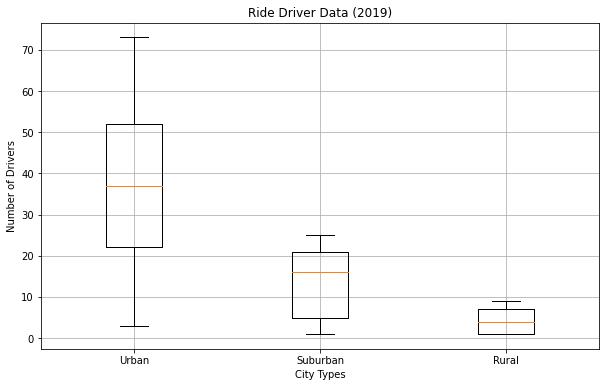

In [173]:
# Add all driver count box-and-whisker plots to the same graph.
fig, ax = plt.subplots(figsize=(10,6))

x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

ax.boxplot(driver_count_data, labels=x_labels)

# Add labels
ax.set_title("Ride Driver Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_xlabel("City Types")
ax.grid()

# Save the figure.
plt.savefig("Analysis/Boxandwhiskers3.png")

plt.show()
